In [1]:
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [5]:
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
data.dropna(inplace=True)

data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876099,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167603,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742661,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565193,132079200
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.631363,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,128.818390,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,124.865578,85438400


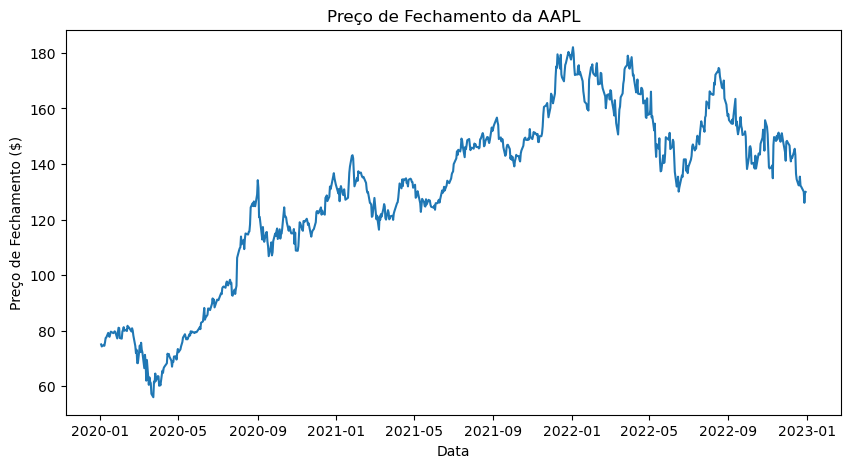

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(data['Close'])
plt.title('Preço de Fechamento da AAPL')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento ($)')
plt.show()

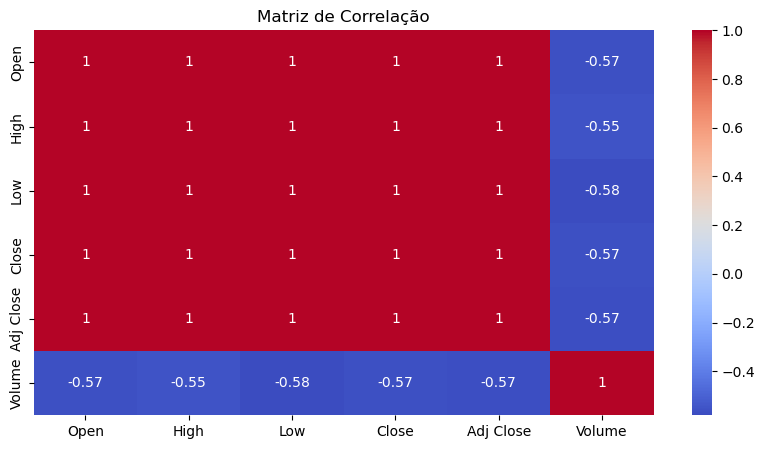

In [7]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [8]:
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

Erro Médio Absoluto: 0.7443786844146343


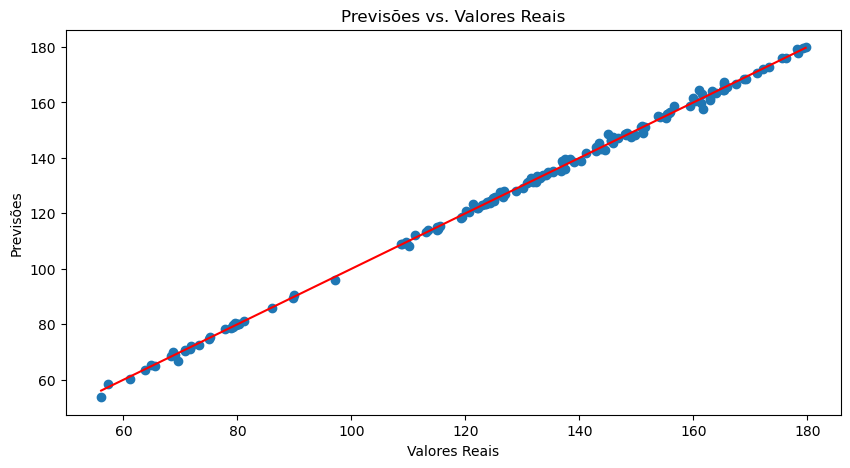

In [12]:
mae = mean_absolute_error(y_test, predictions)
print('Erro Médio Absoluto:', mae)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais')
plt.show()